In [62]:
import numpy as np
import pandas as pd

In [63]:
df = pd.read_csv("final_data.csv")

In [64]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,1,1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,2,2,49,male,1,own,little,NaN,2096,12,education,1
3,3,3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,4,4,53,male,2,free,little,little,4870,24,car,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0.1      1000 non-null   int64 
 1   Unnamed: 0        1000 non-null   int64 
 2   Age               1000 non-null   int64 
 3   Sex               1000 non-null   object
 4   Job               1000 non-null   int64 
 5   Housing           1000 non-null   object
 6   Saving accounts   817 non-null    object
 7   Checking account  606 non-null    object
 8   Credit amount     1000 non-null   int64 
 9   Duration          1000 non-null   int64 
 10  Purpose           1000 non-null   object
 11  Risk              1000 non-null   int64 
dtypes: int64(7), object(5)
memory usage: 93.9+ KB


In [66]:
df.drop(columns = ["Unnamed: 0.1", "Unnamed: 0"], inplace=True)

In [67]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,NaN,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,0
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,1
996,40,male,3,own,little,little,3857,30,car,1
997,38,male,2,own,little,NaN,804,12,radio/TV,1
998,23,male,2,free,little,little,1845,45,radio/TV,0


# 1-Veriyi Keşfetme(Exploratory Data Analysis)

Netleştirmek istediğim featurelar için gptden açıklama istedim;

-> Job: İş durumu veya kategorisi (örneğin, 1, 2 gibi). Kişinin meslek türü veya iş güvencesini ifade edebilir.

-> Housing: Kişinin konut durumu (örneğin, 'own', 'free'). Ev sahipliği veya kira gibi durumlar, finansal istikrar hakkında bilgi verebilir.

-> Saving accounts: Tasarruf hesabı durumu (örneğin, 'little', 'moderate'). Bu, bireyin tasarruf alışkanlıklarını veya finansal birikimini ifade edebilir.

-> Checking account: Vadesiz hesap durumu (örneğin, 'moderate', 'little'). Bu da kişinin mevcut nakit akışı veya hesap durumu hakkında bilgi verebilir.

-> Credit amount: Kredi miktarı. Kişinin talep ettiği kredi miktarı olabilir.

-> Duration: Kredi vadesi (ay cinsinden). Kredinin ne kadar sürede geri ödeneceğini gösterir.

CEVAPLANMASI GEREKEN SORULAR

1. Veri setinde eksik değerler var mı? Hangi kolonlarda var ve bunlarla nasıl başa
çıkılacak?
2. "Age", "Credit amount" ve "Duration" değişkenlerinin dağılımları nedir? Aykırı
değerler var mı?
3. Hedef kolonunda ("iyi" ve "kötü" kredi riski) oran nasıldır? Veri dengesiz mi?
4. "İyi" kredi riski kategorisindeki bireylerin ortalama "Credit amount" değeri nedir?
5. "Free" (bedava) konut kategorisindeki bireylerin "Saving accounts" değişkeninin
dağılımı nasıldır?
6. "İyi" ve "kötü" kredi riski grupları arasında "Duration" farklılık gösteriyor mu?
7. Yüksek kredi miktarına sahip bireylerin (75. percentile üzerinde) en sık kullandığı
3 "Purpose" kategorisi nedir?

### 1. Veri setinde eksik değerler var mı? Hangi kolonlarda var ve bunlarla nasıl başa çıkılacak?

In [68]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [69]:
#saving account ve checking account özelliklerinde null values var

In [70]:
# eksik verilerin oldugunu satırlara bakalım 

missing_rows = df[df.isnull().any(axis= 1)]

In [71]:
missing_rows

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,1
5,35,male,1,free,NaN,NaN,9055,36,education,1
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,1
8,61,male,1,own,rich,NaN,3059,12,radio/TV,1
...,...,...,...,...,...,...,...,...,...,...
991,34,male,1,own,moderate,NaN,1569,15,radio/TV,1
992,23,male,1,rent,NaN,little,1936,18,radio/TV,1
994,50,male,2,own,NaN,NaN,2390,12,car,1
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,1


In [72]:
# hem Saving accounts hem de Checking account null olan satırlara bakalım

In [73]:
common_missing_rows = df[df["Saving accounts"].isnull() & df["Checking account"].isnull()]

In [74]:
common_missing_rows

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
5,35,male,1,free,NaN,NaN,9055,36,education,1
16,53,male,2,own,NaN,NaN,2424,24,radio/TV,1
24,26,male,2,own,NaN,NaN,2069,10,furniture/equipment,1
33,57,male,1,rent,NaN,NaN,1264,12,business,1
53,31,male,2,own,NaN,NaN,3378,18,car,1
...,...,...,...,...,...,...,...,...,...,...
947,38,male,3,own,NaN,NaN,2859,12,car,1
962,29,male,2,own,NaN,NaN,3556,15,car,1
968,29,male,2,rent,NaN,NaN,7166,42,radio/TV,1
990,37,male,1,own,NaN,NaN,3565,12,education,1


In [75]:
# eksik degerleri olan bu ozelliklerideki deger dagılımlarını inceleyecegim

df["Saving accounts"].value_counts(dropna=False)

Saving accounts
little        603
NaN           183
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

In [76]:
df["Checking account"].value_counts(dropna=False)

Checking account
NaN         394
little      274
moderate    269
rich         63
Name: count, dtype: int64

In [77]:
# daha rahat calısabilmek için oncelikle ozellik adlarını düzenlemek istiyorum

# gpt
# Sütun isimlerini küçük harfe çevir
df.columns = df.columns.str.lower()
df

,age,sex,job,housing,saving accounts,checking account,credit amount,duration,purpose,risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,NaN,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,0
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,1
996,40,male,3,own,little,little,3857,30,car,1
997,38,male,2,own,little,NaN,804,12,radio/TV,1
998,23,male,2,free,little,little,1845,45,radio/TV,0


In [78]:
# gpt
# Sütun adını değiştirme
df.rename(columns={'saving accounts': 'saving account'}, inplace=True)
df

,age,sex,job,housing,saving account,checking account,credit amount,duration,purpose,risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,NaN,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,0
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,1
996,40,male,3,own,little,little,3857,30,car,1
997,38,male,2,own,little,NaN,804,12,radio/TV,1
998,23,male,2,free,little,little,1845,45,radio/TV,0


Null deger doldurma aşamasına devam edelim. 

Null degerleri bir önceki degerler ile doldurmaya karar verdim, null oranı düşük, satırların diğer özelliklerini kaybetmek istemedigim yani 478 row'u da kaldırmamak için bu yöntemi seçtim.


In [79]:
df.ffill(inplace=True)

In [80]:
df

,age,sex,job,housing,saving account,checking account,credit amount,duration,purpose,risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,moderate,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,0
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,little,1736,12,furniture/equipment,1
996,40,male,3,own,little,little,3857,30,car,1
997,38,male,2,own,little,little,804,12,radio/TV,1
998,23,male,2,free,little,little,1845,45,radio/TV,0


In [81]:
# 0.indekste saving account NaN imiş. Bu yüzden bir de geri doldurma yaparak tüm null degerlerden kurtulacagız

df.bfill(inplace=True)

In [82]:
df

,age,sex,job,housing,saving account,checking account,credit amount,duration,purpose,risk
0,67,male,2,own,little,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,moderate,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,0
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,little,1736,12,furniture/equipment,1
996,40,male,3,own,little,little,3857,30,car,1
997,38,male,2,own,little,little,804,12,radio/TV,1
998,23,male,2,free,little,little,1845,45,radio/TV,0


In [83]:
# null degerlerimizden kurtulmuş muyuz kontrol edelim
df.isnull().sum()

age                 0
sex                 0
job                 0
housing             0
saving account      0
checking account    0
credit amount       0
duration            0
purpose             0
risk                0
dtype: int64

### 2. "Age", "Credit amount" ve "Duration" değişkenlerinin dağılımları nedir? Aykırı değerler var mı?

In [84]:
# Sayısal değişkenlerin dağılımı 

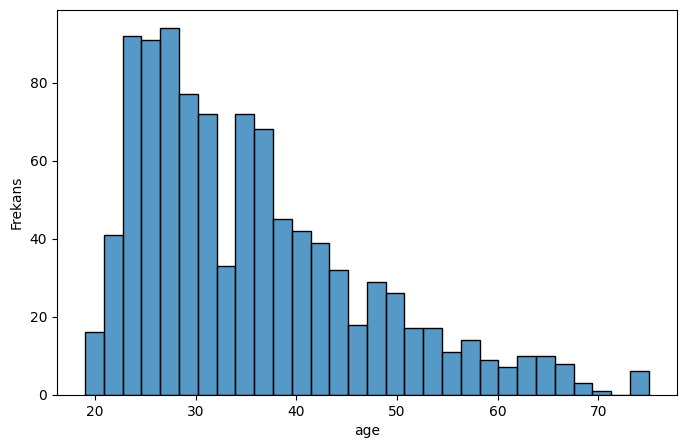

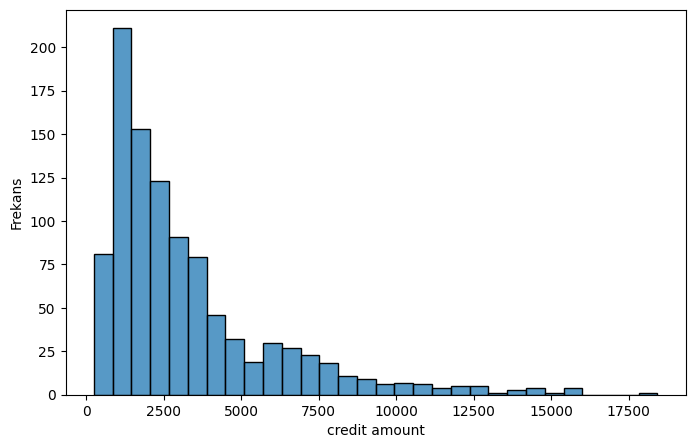

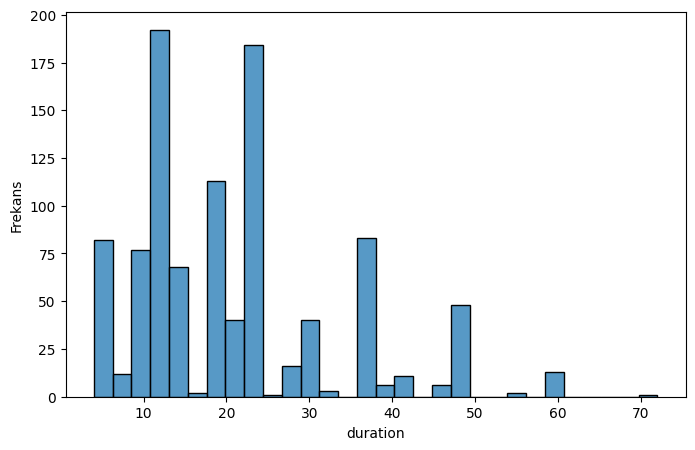

In [85]:
# histogram grafikleri 
import matplotlib.pyplot as plt
import seaborn as sns

columns= ["age", "credit amount", "duration"]
for col in columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], bins=30)
    plt.ylabel("Frekans")

(veriler 1994 yılından)

histograma bakarak yapabildiğim yorumlar;

age: 24-28 yaş arası kredi başvurusu daha yogun ve bu 30 yaştan sonra genelde düşme eğiliminde. Bunun sebebi kariyerine yeni başlayan insanların henüz sermaye biriktiremeiş olması olabilir.

credit amount: en cok kredi istenen tutar yaklaşık 1000eur0, sonrasında giderek azalmış

duration: birim ay olarak ve genelde 12 ay, 24 ay ve 36 ayda yükselmeler var. Bu da 1,2 ve 3 yıllık krediler çekilmesi ile ilişkili.


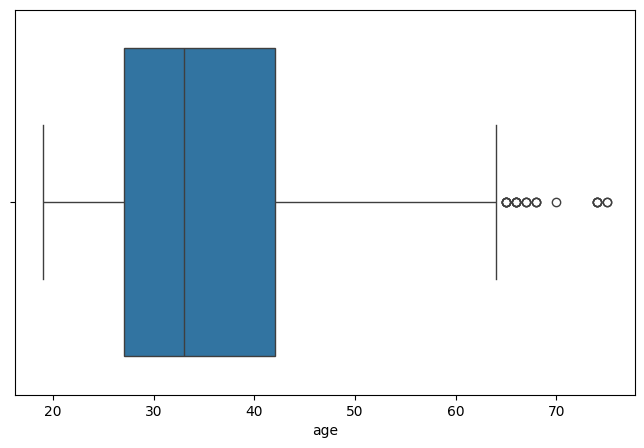

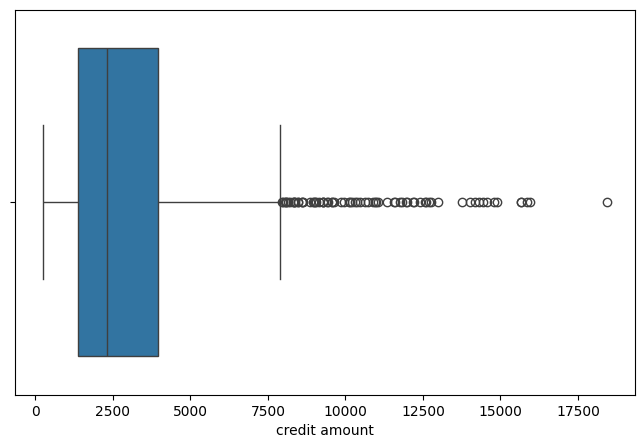

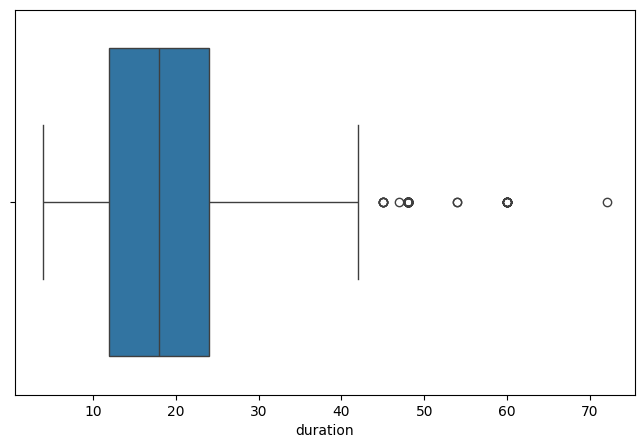

In [86]:
#boxplot grafikleri
for col in columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df[col])
    plt.xlabel(col)
    plt.show()


Boxplotlar histogram grafiklerini doğrular nitelikte.

credit amount oldukca outlier içeriyor, bunun sebebi cogunlugun büyük oranda 2000 euro civarı olması ve üst sınırlarda para çeken insanların da fazlasıyla bulunması, eger outlierları cıkarırsam bu fazlaca yüksek kredi çeken insanları tahminleme yetenegimi kaybederim. Bu sebepten hiçbir outlier degerime dokunmayacagım.

### 3. Hedef kolonunda ("iyi" ve "kötü" kredi riski) oran nasıldır? Veri dengesiz mi?

In [87]:
df["risk"].value_counts()

risk
1    700
0    300
Name: count, dtype: int64

Bu sonuçlara dengeli bir dağılımdır diyemeyiz. %30 risksiz iken %70 riskli grubu oluşturuyor.

### 4. "İyi" kredi riski kategorisindeki bireylerin ortalama "Credit amount" değeri nedir?

In [88]:
# iyi kredi riski demek risk=0 

df[df["risk"] == 0]["credit amount"].mean()



3938.1266666666666

In [89]:
#risk=1 olanlara da bakalım

df[df["risk"] == 1]["credit amount"].mean()


2985.457142857143

Risk değeri kötü olan kişilerin talep ettiği kredi miktarının, risk değeri iyi olan kişilere göre yaklaşık 1000 euro daha az olduğunu görüyoruz.

### 5. "Free" (bedava) konut kategorisindeki bireylerin "Saving accounts" değişkeninin dağılımı nasıldır?

In [90]:
free_housing = df[df["housing"] == "free"]["saving account"].value_counts()

In [91]:
free_housing

saving account
little        85
moderate      14
quite rich     7
rich           2
Name: count, dtype: int64

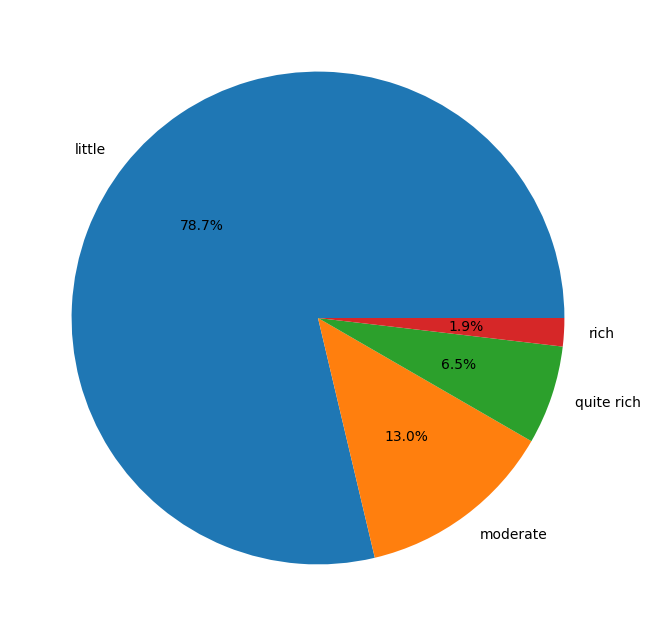

In [92]:
plt.figure(figsize=(8,8))
plt.pie(free_housing.values, labels = free_housing.index, autopct='%1.1f%%')
plt.show()

"free" konut kategorisindeki bireylerin büyük çogunlugunun finansal birikimi "little" kategorisindedir.

### 6. "İyi" ve "kötü" kredi riski grupları arasında "Duration" farklılık gösteriyor mu?


In [93]:
df[df["risk"] == 1]["duration"].mean()

19.207142857142856

In [94]:
df[df["risk"]== 0]["duration"].mean()

24.86

Risk teşkil eden grubun duration degeri etmeyenlere göre yaklaşık 6 ay daha kısa.

### 7. Yüksek kredi miktarına sahip bireylerin (75. percentile üzerinde) en sık kullandığı 3 "Purpose" kategorisi nedir?

In [95]:
df[df["credit amount"] > df["credit amount"].quantile(0.75)]

,age,sex,job,housing,saving account,checking account,credit amount,duration,purpose,risk
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,0
5,35,male,1,free,little,little,9055,36,education,1
7,35,male,3,rent,little,moderate,6948,36,car,1
...,...,...,...,...,...,...,...,...,...,...
981,33,male,3,rent,little,moderate,4844,48,business,0
983,26,male,2,own,little,little,8229,36,car,0
986,33,male,2,own,little,rich,6289,42,business,1
988,29,male,3,free,little,little,6579,24,car,1


In [96]:
top3 = df[df["credit amount"] > df["credit amount"].quantile(0.75)]["purpose"].value_counts()
top3

purpose
car                    108
radio/TV                39
business                39
furniture/equipment     38
education               13
vacation/others          8
repairs                  4
domestic appliances      1
Name: count, dtype: int64

In [97]:
top3.head(3)

purpose
car         108
radio/TV     39
business     39
Name: count, dtype: int64

Yüksek kredi miktarına sahip bireylerin açık bir farkla en çok car, ardından radio/TV ve business amaçlarının olduğunu görüyoruz.

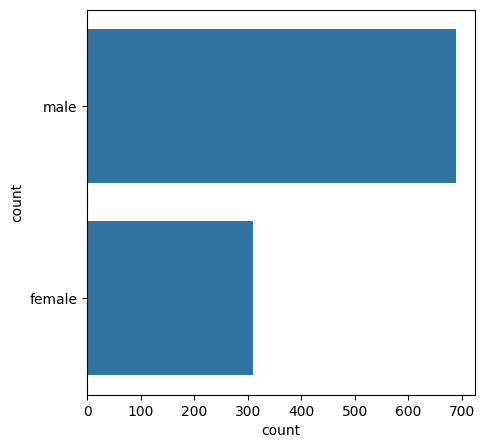

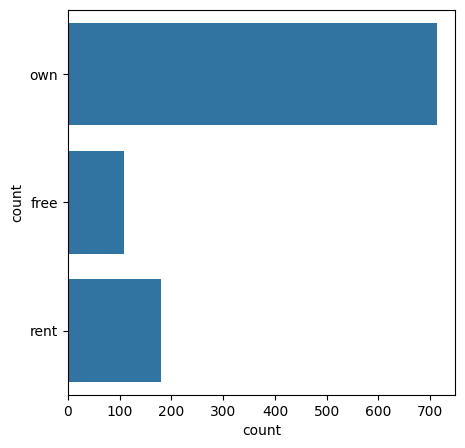

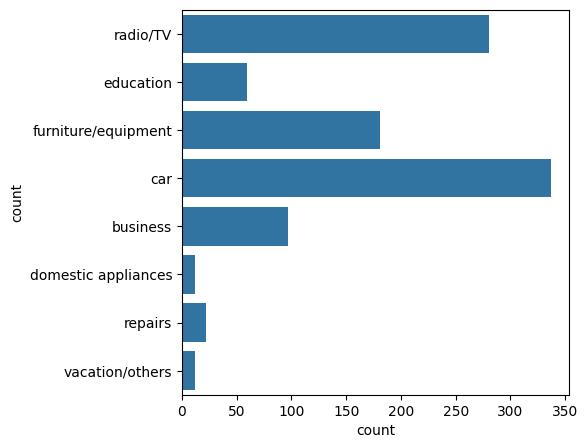

In [98]:
#  Kategorik değişkenlerin sayımları ("Sex", "Housing", "Purpose" için çubuk grafikler):

columns= ["sex", "housing", "purpose"]
for col in columns:
    plt.figure(figsize=(5,5))
    sns.countplot(df[col])
    plt.ylabel("count")
    plt.show()

Çoğunlugun kendi evi var.

Çoğunluk erkekler. 

Çoğunluk sırasıyla araba, radio/TV almak için kredi çekmek istiyor.

<function matplotlib.pyplot.show(close=None, block=None)>

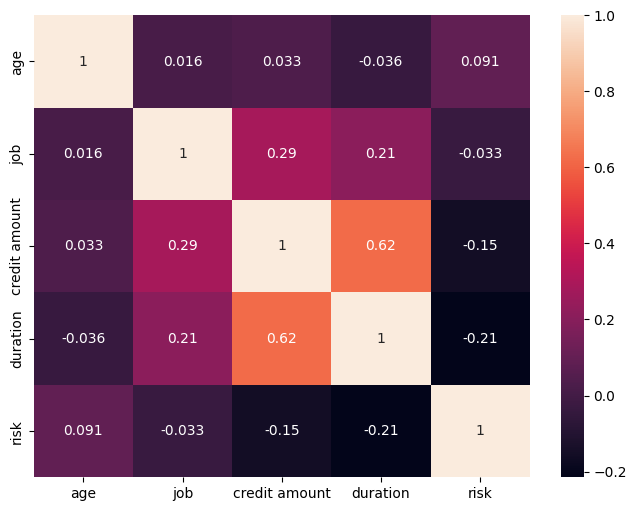

In [99]:
# Sayısal özellikler arasındaki ilişkileri anlamak için korelasyon haritası:
# sadece float ve int olanları filtrelemeliyiz

numeric= df.select_dtypes(include=["float64", "int64"])

corr_matr = numeric.corr()

plt.figure(figsize= (8,6))
sns.heatmap(corr_matr,annot=True, )
plt.show


Duration ve credit amount arasında pozitif bir ilişki sözkonusu.

Duration ile riskin ise düşük düzey negatif ilişkisi mevcut.

Job özelliğinin duration ve credit amount ile düşük düzey bir ilişkisi sözkonusu.

Çok yüksek korelasyona sahip(>0.9) yani neredeyse aynı olan etkiyi yaratan durum yok. O yüzden buna bakarak özellik elemesi yapmadım.

# 2. Veri Temizleme ve Önİşleme

In [100]:
# kategorik değişkenleri sayısal degerler ile sınıflandıracagız
# sex, housing,	saving account,	checking account ve purpose kategorik değişkenlerimiz
# mapping kullanacagım


In [101]:
df.nunique()

age                  53
sex                   2
job                   4
housing               3
saving account        4
checking account      3
credit amount       921
duration             33
purpose               8
risk                  2
dtype: int64

In [102]:
df["saving account"].value_counts()

saving account
little        741
moderate      127
quite rich     75
rich           57
Name: count, dtype: int64

In [103]:
saving_acc_mapping= {
    "little":0,
    "moderate":1,
    "quite rich":2,
    "rich":3 
}

In [104]:
df["saving account"]  =  df["saving account"].map(saving_acc_mapping)

In [105]:
df

,age,sex,job,housing,saving account,checking account,credit amount,duration,purpose,risk
0,67,male,2,own,0,little,1169,6,radio/TV,1
1,22,female,2,own,0,moderate,5951,48,radio/TV,0
2,49,male,1,own,0,moderate,2096,12,education,1
3,45,male,2,free,0,little,7882,42,furniture/equipment,1
4,53,male,2,free,0,little,4870,24,car,0
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,0,little,1736,12,furniture/equipment,1
996,40,male,3,own,0,little,3857,30,car,1
997,38,male,2,own,0,little,804,12,radio/TV,1
998,23,male,2,free,0,little,1845,45,radio/TV,0


In [106]:
housing_mapping= {
    "free":0,
    "rent":1,
    "own":2
}

In [107]:
df["housing"] = df["housing"].map(housing_mapping)

In [108]:
df

,age,sex,job,housing,saving account,checking account,credit amount,duration,purpose,risk
0,67,male,2,2,0,little,1169,6,radio/TV,1
1,22,female,2,2,0,moderate,5951,48,radio/TV,0
2,49,male,1,2,0,moderate,2096,12,education,1
3,45,male,2,0,0,little,7882,42,furniture/equipment,1
4,53,male,2,0,0,little,4870,24,car,0
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,2,0,little,1736,12,furniture/equipment,1
996,40,male,3,2,0,little,3857,30,car,1
997,38,male,2,2,0,little,804,12,radio/TV,1
998,23,male,2,0,0,little,1845,45,radio/TV,0


In [109]:
df["checking account"].value_counts()

checking account
moderate    459
little      452
rich         89
Name: count, dtype: int64

In [110]:
checking_acc_mapping= {
    "little":0,
    "moderate":1,
    "rich":2
}

In [111]:
df["checking account"]  =  df["checking account"].map(checking_acc_mapping)

In [112]:
df

,age,sex,job,housing,saving account,checking account,credit amount,duration,purpose,risk
0,67,male,2,2,0,0,1169,6,radio/TV,1
1,22,female,2,2,0,1,5951,48,radio/TV,0
2,49,male,1,2,0,1,2096,12,education,1
3,45,male,2,0,0,0,7882,42,furniture/equipment,1
4,53,male,2,0,0,0,4870,24,car,0
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,2,0,0,1736,12,furniture/equipment,1
996,40,male,3,2,0,0,3857,30,car,1
997,38,male,2,2,0,0,804,12,radio/TV,1
998,23,male,2,0,0,0,1845,45,radio/TV,0


In [113]:
df["purpose"].value_counts()

purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64

In [114]:
purpose_mapping ={
    "car":0,
    "radio/TV":1,
    "furniture/equipment":2,
    "business":3,
    "education":4,
    "repairs":5,
    "domestic appliances":6,
    "vacation/others":7

}

In [115]:
df["purpose"] = df["purpose"].map(purpose_mapping)

In [116]:
df

,age,sex,job,housing,saving account,checking account,credit amount,duration,purpose,risk
0,67,male,2,2,0,0,1169,6,1,1
1,22,female,2,2,0,1,5951,48,1,0
2,49,male,1,2,0,1,2096,12,4,1
3,45,male,2,0,0,0,7882,42,2,1
4,53,male,2,0,0,0,4870,24,0,0
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,2,0,0,1736,12,2,1
996,40,male,3,2,0,0,3857,30,0,1
997,38,male,2,2,0,0,804,12,1,1
998,23,male,2,0,0,0,1845,45,1,0


In [117]:
sex_mapping = {
    "male":0,
    "female":1
}

In [118]:
df["sex"]= df["sex"].map(sex_mapping)

In [119]:
df

,age,sex,job,housing,saving account,checking account,credit amount,duration,purpose,risk
0,67,0,2,2,0,0,1169,6,1,1
1,22,1,2,2,0,1,5951,48,1,0
2,49,0,1,2,0,1,2096,12,4,1
3,45,0,2,0,0,0,7882,42,2,1
4,53,0,2,0,0,0,4870,24,0,0
...,...,...,...,...,...,...,...,...,...,...
995,31,1,1,2,0,0,1736,12,2,1
996,40,0,3,2,0,0,3857,30,0,1
997,38,0,2,2,0,0,804,12,1,1
998,23,0,2,0,0,0,1845,45,1,0


Tüm kategorik değişkenleri sayısal degerleri ile kategoriledik.

#  3. Özellik Mühendisliği

In [121]:
# scale etmeden önce ayda ne kadar kredi alacağı hesaplaması ile yeni bir sütun oluşturalım

df["credit per month"] = df["credit amount"] / df["duration"]
df

,age,sex,job,housing,saving account,checking account,credit amount,duration,purpose,risk,credit per month
0,67,0,2,2,0,0,1169,6,1,1,194.833333
1,22,1,2,2,0,1,5951,48,1,0,123.979167
2,49,0,1,2,0,1,2096,12,4,1,174.666667
3,45,0,2,0,0,0,7882,42,2,1,187.666667
4,53,0,2,0,0,0,4870,24,0,0,202.916667
...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1,2,0,0,1736,12,2,1,144.666667
996,40,0,3,2,0,0,3857,30,0,1,128.566667
997,38,0,2,2,0,0,804,12,1,1,67.000000
998,23,0,2,0,0,0,1845,45,1,0,41.000000


In [122]:
# age, duration, credit amount, credit per month degerleri aynı scalede degil, bu da ozelliklerin önemlerinin dengesizliğine sebep olur

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df[['age', 'credit amount', 'duration', "credit per month"]] = scaler.fit_transform(df[['age', 'credit amount', 'duration',"credit per month"]])

In [123]:
df

,age,sex,job,housing,saving account,checking account,credit amount,duration,purpose,risk,credit per month
0,2.766456,0,2,2,0,0,-0.745131,-1.236478,1,1,0.176948
1,-1.191404,1,2,2,0,1,0.949817,2.248194,1,0,-0.284901
2,1.183312,0,1,2,0,1,-0.416562,-0.738668,4,1,0.045495
3,0.831502,0,2,0,0,0,1.634247,1.750384,2,1,0.130233
4,1.535122,0,2,0,0,0,0.566664,0.256953,0,0,0.229637
...,...,...,...,...,...,...,...,...,...,...,...
995,-0.399832,1,1,2,0,0,-0.544162,-0.738668,2,1,-0.150054
996,0.391740,0,3,2,0,0,0.207612,0.754763,0,1,-0.254998
997,0.215835,0,2,2,0,0,-0.874503,-0.738668,1,1,-0.656308
998,-1.103451,0,2,0,0,0,-0.505528,1.999289,1,0,-0.825784


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1000 non-null   float64
 1   sex               1000 non-null   int64  
 2   job               1000 non-null   int64  
 3   housing           1000 non-null   int64  
 4   saving account    1000 non-null   int64  
 5   checking account  1000 non-null   int64  
 6   credit amount     1000 non-null   float64
 7   duration          1000 non-null   float64
 8   purpose           1000 non-null   int64  
 9   risk              1000 non-null   int64  
 10  credit per month  1000 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 86.1 KB


Artık scale edilmiş yeni ozellik eklenmiş ve tüm degerleri sayısal olmuş bir verisetimiz var.



# 4.Model Uygulaması ve Değerlendirme

### 4.1.Logistic Regression

In [129]:
#targetimizi ve bagımsız degiskenlerimizi atayalım

X = df.drop("risk", axis=1)  #bagımsızlar-sonucu etkileyenler
y =  df["risk"] #bagımlı-target

In [137]:
#veri setimizi eğitim ve test olarak bölüyorum

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



In [138]:
#modeli tanımlayıp eğitecegim

from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()


In [221]:
logistic_model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1.8, 1: 1.0})

In [222]:
y_pred= logistic_model.predict(X_test)

In [223]:
y_pred

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1], dtype=int64)

In [224]:
y_test

507    0
818    1
452    1
368    0
242    0
      ..
430    1
874    1
550    1
608    1
207    1
Name: risk, Length: 200, dtype: int64

In [225]:
correct_predictions = (y_test == y_pred)

correct_predictions_sum = correct_predictions.sum()
correct_predictions_sum 


140

In [226]:
correct_predictions_sum /200 

0.7

Test verisetinde tahmin edilen ve gerçek degerlerimiz %74.5 oranında aynı.

In [227]:
#modeli degerlendirelim

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

#accuracy = accuracy_score(y_test, y_pred)
print("accuracy: ",  accuracy_score(y_test, y_pred))
print("recall: ", recall_score(y_test, y_pred))
print("precision: ", precision_score(y_test, y_pred))
print("f1-score: ", f1_score(y_pred, y_test))




accuracy:  0.7
recall:  0.7659574468085106
precision:  0.8
f1-score:  0.782608695652174


In [228]:
# risksiz toldugu halde riskli tahmin edilenler var(precision:0.75). Ama bu bence sorun degil tam tersi sorun olurdu.

In [229]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[ 32,  27],
       [ 33, 108]], dtype=int64)

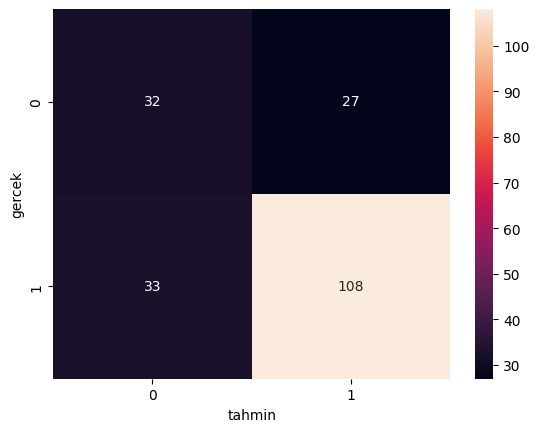

In [230]:
#gorsellestirelim

sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel("gercek")
plt.xlabel("tahmin")
plt.show()

In [208]:
df["risk"].value_counts()

risk
1    700
0    300
Name: count, dtype: int64

In [220]:
#gerçek 0'lar büyük oranda yanlış tahmin edilmiş, sebebi veri setinin cogunlukla 1lerden oluşması, Bunu düzeltmek için class weight yontemleri kullanabilirim
#manuel olarak yapacagım
#gpt
class_weights = {0: 1.8, 1: 1.0}

logistic_model = LogisticRegression(class_weight=class_weights)
logistic_model.fit(X_train, y_train)


LogisticRegression(class_weight={0: 1.8, 1: 1.0})

In [232]:
#0 sınıfını tahminleyebildigi soyleyemez ama bu şekilde zar atmaktan daha kotu degil

### 4.2.KNN Classification

In [233]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [235]:
knn_model = KNeighborsClassifier()
knn_model

KNeighborsClassifier()

In [236]:
k_optimal = range(1,100)
cv_scores= []

In [239]:
#gpt
for k in k_optimal:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')  
    cv_scores.append(scores.mean())

In [241]:
#gpt
best_k = k_optimal[np.argmax(cv_scores)]
print(f"En iyi k değeri: {best_k}")

En iyi k değeri: 29


In [242]:
#KNN ile egit

knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=29)

In [243]:
y_pred = knn_model.predict(X_test)


In [245]:
print("accuracy: ",  accuracy_score(y_test, y_pred))
print("recall: ", recall_score(y_test, y_pred))
print("precision: ", precision_score(y_test, y_pred))
print("f1-score: ", f1_score(y_pred, y_test))


accuracy:  0.715
recall:  0.9432624113475178
precision:  0.7307692307692307
f1-score:  0.8235294117647058


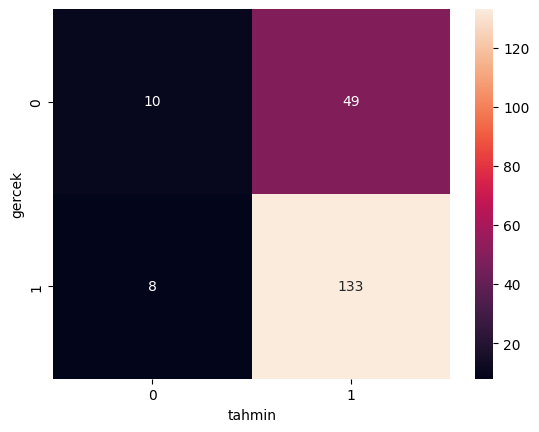

In [246]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel("gercek")
plt.xlabel("tahmin")
plt.show()